In [1]:
!pwd

/home/kei/Desktop/CausalKinetiX-Python/dev


In [2]:
import numbers
import numpy as np
from matplotlib import pyplot as plt
import os
os.chdir("/home/kei/Desktop/CausalKinetiX-Python/")
from CausalKinetiX import CausalKinetiX
from CausalKinetiX.CausalKinetiX_modelranking import CausalKinetiX_modelranking
from CausalKinetiX.constrained_smoothspline import constrained_smoothspline
from CausalKinetiX.generate_data_targetmodel import generate_data_targetmodel
from CausalKinetiX.generate_data_maillard import generate_data_maillard

In [3]:
!ls

CausalKinetiX  dev  LICENCE  README.md	setup.py


In [4]:
!ls CausalKinetiX

BSbasis.py		       constrained_smoothspline.py   __init__.py
CausalKinetiX_modelranking.py  generate_data_maillard.py     __pycache__
CausalKinetiX.py	       generate_data_targetmodel.py  utils.py


# Target Model

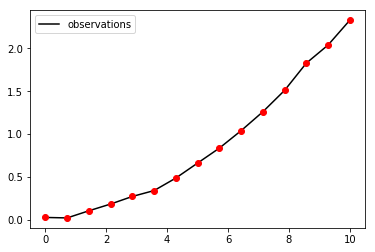

In [5]:
simulation_obj = generate_data_targetmodel(env=np.array(list(range(5))*3),
                                            L=15,
                                            d=5)
D = simulation_obj["simulated_data"]
fulldata = simulation_obj["true_model"]
time = simulation_obj["time"]
env = simulation_obj["env"]
target = simulation_obj["target"]
# plot the observation of target variable in environment 0
plt.plot(time, D[0,-len(time):], '-',c="black")
plt.plot(time, D[0,-len(time):], 'o',c="red")
plt.legend(["observations"])


In [6]:
CausalKinetiX(D = D, times = time, env=env, target = target)

{'models': [[[0], [1], [2]],
  [[0], [1], [3]],
  [[0], [1], [4]],
  [[0], [2], [3]],
  [[0], [2], [4]],
  [[0], [3], [4]],
  [[1], [2], [3]],
  [[1], [2], [4]],
  [[1], [3], [4]],
  [[2], [3], [4]]],
 'model_scores': array([4.57129675e+11, 3.45441111e+11, 3.46463494e+11, 1.12967608e+14,
        8.17078720e+13, 9.15862410e+13, 1.94703161e+13, 3.21092199e+12,
        7.87969941e+13, 1.49899741e+14]),
 'variable_scores': array([0.        , 0.        , 0.66666667, 0.66666667, 0.66666667]),
 'ranking': array([0, 1, 2, 3, 4]),
 'others(for dedug)': {'counts': array([3, 3, 1, 1, 1]),
  'Mlen': 10,
  'Mjlen': array([6, 6, 6, 6, 6]),
  'K': 3}}

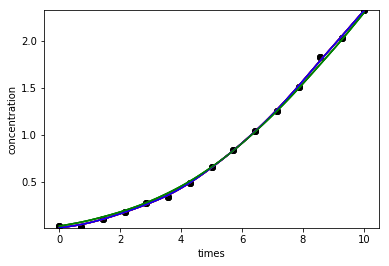

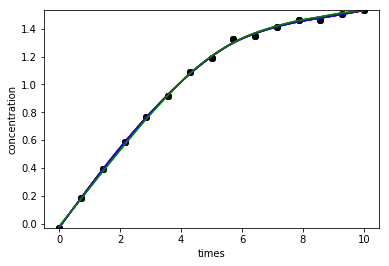

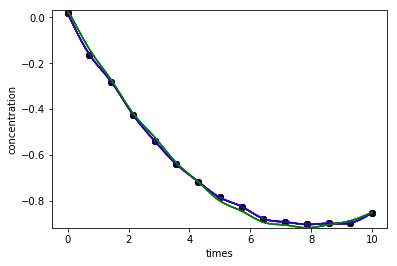

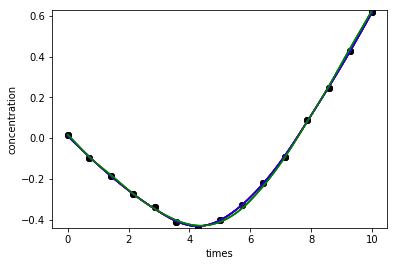

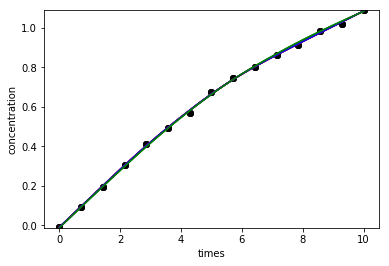

array([4.59315309e+11])

In [7]:
CausalKinetiX_modelranking(D, time, env, target, [[[0],[1]]], include_vars=None, show_plot=True, integrated_model=False)#, regression_class='random_forest')

In [8]:
fit = constrained_smoothspline(D[1,60:],
                                          time,
                                          2,
                                          constraint="none",
                                          times_new=time,
                                          num_folds=2,
                                          lambd="optim")

In [9]:
fit.keys()

dict_keys(['smooth_vals', 'residuals', 'smooth_vals_new', 'smooth_deriv', 'pen_par'])

# Maillard Model

Currently solving ODE-system on environment 0
Currently solving ODE-system on environment 1
Currently solving ODE-system on environment 2
Currently solving ODE-system on environment 3
Currently solving ODE-system on environment 4


[[0], [1], [0, 9]]

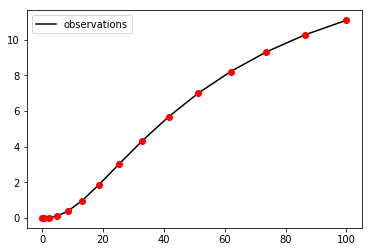

In [10]:
simulation_obj = generate_data_maillard(env=np.array(list(range(5))*3),
                                        L=15,
                                        target=0)
D = simulation_obj["simulated_data"]
time = simulation_obj["time"]
env = simulation_obj["env"]
target = simulation_obj["target"]
# plot the observation of target variable in environment 0
plt.plot(time, D[0,-len(time):], '-',c="black")
plt.plot(time, D[0,-len(time):], 'o',c="red")
plt.legend(["observations"])

simulation_obj["true_model"]

In [11]:
CausalKinetiX(D = D, times = time, env=env, target = target, interactions=True, products=True)

{'models': [[[0], [1], [2], [0, 1], [0, 2], [1, 2], [0, 0], [1, 1], [2, 2]],
  [[0], [1], [3], [0, 1], [0, 3], [1, 3], [0, 0], [1, 1], [3, 3]],
  [[0], [1], [4], [0, 1], [0, 4], [1, 4], [0, 0], [1, 1], [4, 4]],
  [[0], [1], [5], [0, 1], [0, 5], [1, 5], [0, 0], [1, 1], [5, 5]],
  [[0], [1], [6], [0, 1], [0, 6], [1, 6], [0, 0], [1, 1], [6, 6]],
  [[0], [1], [7], [0, 1], [0, 7], [1, 7], [0, 0], [1, 1], [7, 7]],
  [[0], [1], [8], [0, 1], [0, 8], [1, 8], [0, 0], [1, 1], [8, 8]],
  [[0], [1], [9], [0, 1], [0, 9], [1, 9], [0, 0], [1, 1], [9, 9]],
  [[0], [1], [10], [0, 1], [0, 10], [1, 10], [0, 0], [1, 1], [10, 10]],
  [[0], [2], [3], [0, 2], [0, 3], [2, 3], [0, 0], [2, 2], [3, 3]],
  [[0], [2], [4], [0, 2], [0, 4], [2, 4], [0, 0], [2, 2], [4, 4]],
  [[0], [2], [5], [0, 2], [0, 5], [2, 5], [0, 0], [2, 2], [5, 5]],
  [[0], [2], [6], [0, 2], [0, 6], [2, 6], [0, 0], [2, 2], [6, 6]],
  [[0], [2], [7], [0, 2], [0, 7], [2, 7], [0, 0], [2, 2], [7, 7]],
  [[0], [2], [8], [0, 2], [0, 8], [2, 8], [0, 0

In [12]:
import numbers
import numpy as np
from matplotlib import pyplot as plt
import os
os.chdir("/home/kei/Desktop/CausalKinetiX-Python/")
from CausalKinetiX import CausalKinetiX
from CausalKinetiX.CausalKinetiX_modelranking import CausalKinetiX_modelranking
from CausalKinetiX.constrained_smoothspline import constrained_smoothspline
from CausalKinetiX.generate_data_targetmodel import generate_data_targetmodel
from CausalKinetiX.generate_data_maillard import generate_data_maillard

In [13]:
from CausalKinetiX.utils import construct_models, extend_Dmat

Currently solving ODE-system on environment 0
Currently solving ODE-system on environment 1
Currently solving ODE-system on environment 2
Currently solving ODE-system on environment 3
Currently solving ODE-system on environment 4


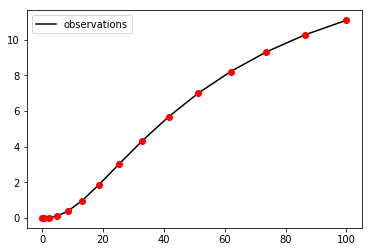

In [14]:
simulation_obj = generate_data_maillard(env=np.array(list(range(5))*3),
                                        L=15,
                                        target=0)
D = simulation_obj["simulated_data"]
fulldata = simulation_obj["true_model"]
time = simulation_obj["time"]
env = simulation_obj["env"]
target = simulation_obj["target"]
# plot the observation of target variable in environment 0
plt.plot(time, D[0,-len(time):], '-',c="black")
plt.plot(time, D[0,-len(time):], 'o',c="red")
plt.legend(["observations"])


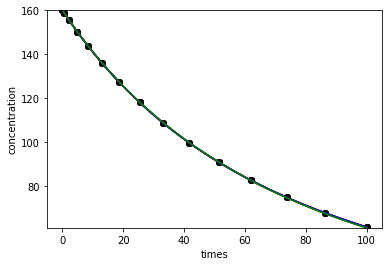

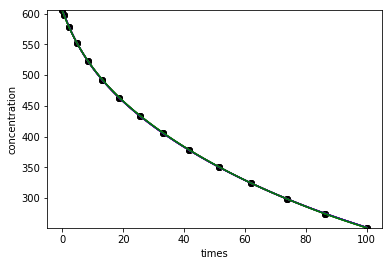

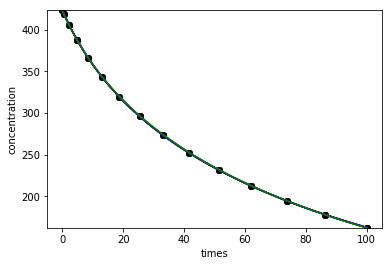

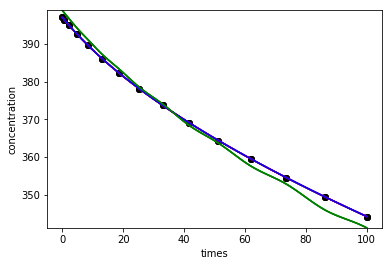

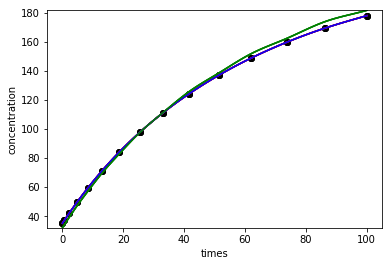

array([5.43848518e+11])

In [15]:
CausalKinetiX_modelranking(D, time, env, target, 
                           [[[0], [1], [0, 9]]],
                           include_vars=None, show_plot=True, integrated_model=False )

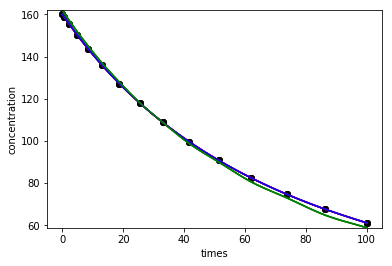

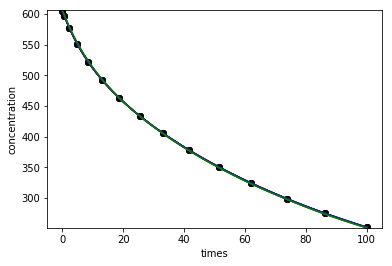

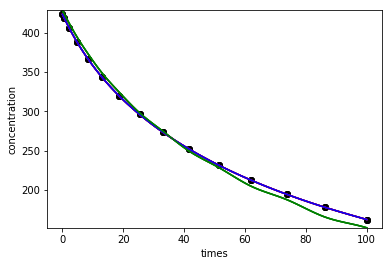

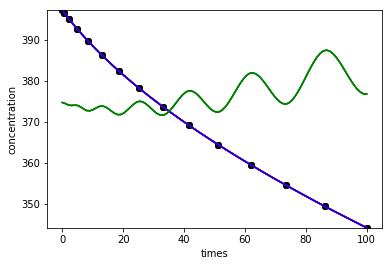

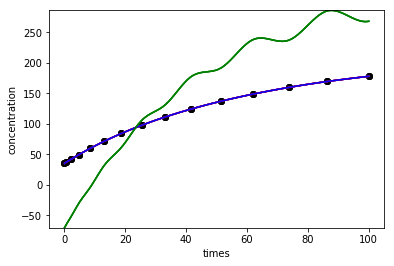

array([1.3916484e+14])

In [16]:
CausalKinetiX_modelranking(D, time, env, target, 
                           [[[0], [1], [9], [0, 1], [0, 9], [1, 9], [0, 0], [1, 1], [9, 9]]],
                           include_vars=None, show_plot=True, integrated_model=False )